<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Meus-Estudos/blob/master/UDEMY_Limpeza_e_Tratamento_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount( '' )

Mounted at /content/drive


In [2]:
# Bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts

In [52]:
url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Projects-with-Python/main/dataset/Churn_Modelling.csv'

dataset = pd.read_csv( url )
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Tamanho do dataset
dataset.shape

(10000, 14)

In [54]:
# 1o. problema - definir e dar nome às colunas
dataset.columns = [ 'Linha', 'Id', 'Nome', 'Score', 'Pais', 'Sexo', 'Idade', 'Tenure', 'Saldo', 'Produtos', 'Cartao', 'Ativo', 'Salario', 'Saiu' ]
dataset.head()

,Linha,Id,Nome,Score,Pais,Sexo,Idade,Tenure,Saldo,Produtos,Cartao,Ativo,Salario,Saiu
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Análise Exploratória dos Dados**

Dados Catergóricos

In [7]:
# Explorar daos categóricos
agrupado = dataset.groupby( ['Pais'] ).size()
agrupado

Pais
France     5014
Germany    2509
Spain      2477
dtype: int64

<AxesSubplot:xlabel='Pais'>

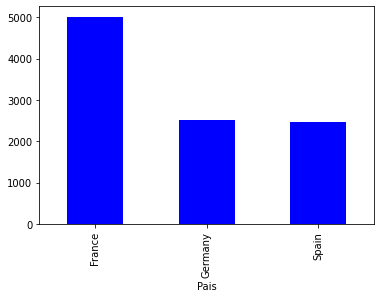

In [9]:
agrupado.plot.bar( color='blue' )

<AxesSubplot:xlabel='Sexo'>

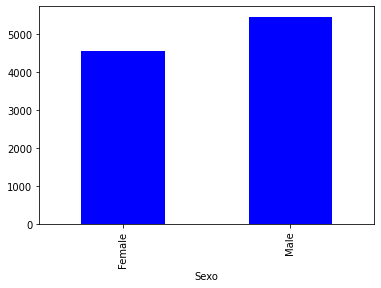

In [13]:
agrupado = dataset.groupby( ['Sexo'] ).size()
agrupado.plot.bar( color = 'blue' )

**Dados Numéricos**

In [14]:
# Score
dataset[ 'Score' ].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: Score, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

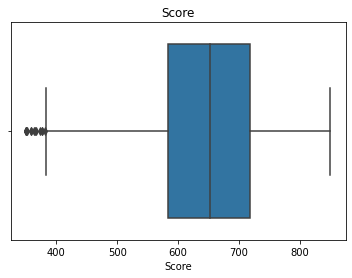

In [17]:
sns.boxplot( dataset['Score'] ).set_title( 'Score' )

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

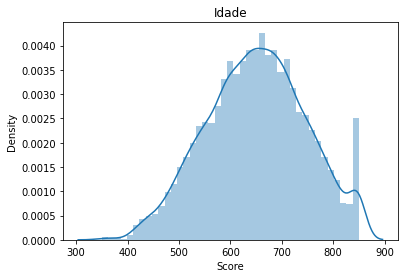

In [28]:
sns.distplot( dataset['Score'] ).set_title( 'Idade' )

In [19]:
# Idade
dataset['Idade'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Idade, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

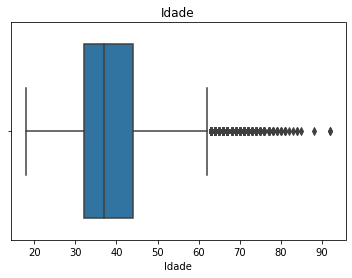

In [22]:
sns.boxplot( dataset['Idade'] ).set_title( 'Idade' )

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

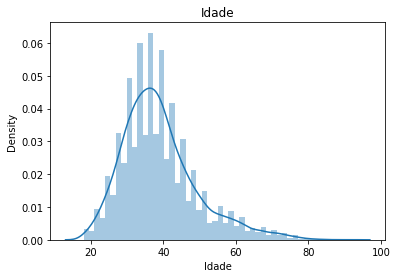

In [23]:
sns.distplot( dataset['Idade'] ).set_title( 'Idade' )

In [26]:
# Saldo
dataset['Saldo'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Saldo, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Saldo')

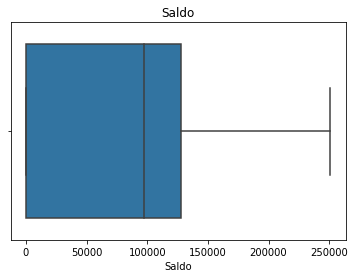

In [27]:
sns.boxplot( dataset['Saldo'] ).set_title( 'Saldo' )

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saldo')

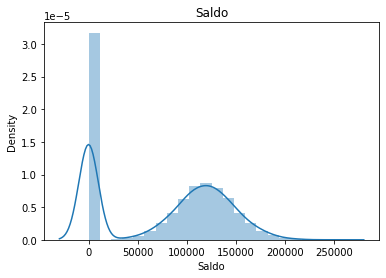

In [32]:
sns.distplot( dataset['Saldo'] ).set_title( 'Saldo' )

In [29]:
# Salário
dataset['Salario'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: Salario, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Salário')

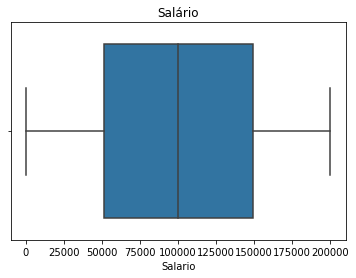

In [30]:
sns.boxplot( dataset['Salario'] ).set_title( 'Salário' )

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salário')

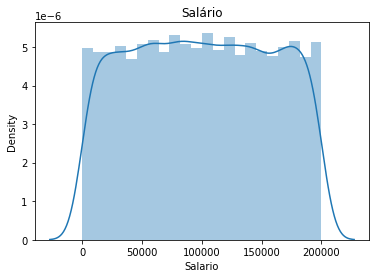

In [31]:
sns.distplot( dataset['Salario'] ).set_title( 'Salário' )

In [33]:
# Verificando valores nulos
dataset.isnull().sum()

Linha       0
Id          0
Nome        0
Score       0
Pais        0
Sexo        0
Idade       0
Tenure      0
Saldo       0
Produtos    0
Cartao      0
Ativo       0
Salario     0
Saiu        0
dtype: int64

In [34]:
# Calcular a Mediana dos salários
dataset['Salario'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: Salario, dtype: float64

In [35]:
mediana = sts.median( dataset['Salario'] )
mediana

100193.915

In [37]:
# Substituir NAN por Mediana
dataset['Salario'].fillna( mediana, inplace=True )

In [38]:
dataset['Salario'].isnull().sum()

0

In [40]:
# Padronizar os valores
agrupoado = dataset.groupby( ['Sexo'] ).size()
agrupado

Sexo
Female    4543
Male      5457
dtype: int64

In [43]:
# Padronizar
dataset.loc[ dataset['Sexo'] == 'Male', 'Sexo' ] = 'Masculino'
dataset.loc[ dataset['Sexo'].isin( ['Fem', 'F', 'Female' ]), 'Sexo' ] = 'Feminino'

agrupado = dataset.groupby( dataset['Sexo'] ).size()
agrupado

Sexo
Feminino     4543
Masculino    5457
dtype: int64

In [45]:
# Idades fora do domínio
dataset['Idade'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Idade, dtype: float64

In [47]:
dataset.loc[ ( dataset['Idade'] <= 0 ) | ( dataset['Idade'] > 120 ) ]

,Linha,Id,Nome,Score,Pais,Sexo,Idade,Tenure,Saldo,Produtos,Cartao,Ativo,Salario,Saiu


In [48]:
# Calcular a mediana
mediana = sts.median( dataset['Idade'])

# Substituir
dataset.loc[ ( dataset['Idade'] <= 0 ) | ( dataset['Idade'] > 120 ), 'Idade' ] = mediana

In [ ]:
# Buscar por valores duplicados
dataset[ dataset.duplicated( ['Id'], keep=False ) ]

In [ ]:
# Excluir pelo ID
dataset.drop_duplicates( subset='Id', keep='first', inplace=True )

# Buscar por valores duplicados
dataset[ dataset.duplicated( ['Id'], keep=False ) ]

In [58]:
# Outliers no Salário, vamos considerar 2 desvios padrão
desvpad = sts.stdev( dataset['Salario'] )
mediana = sts.median( dataset['Salario'])

In [ ]:
dataset.loc[ dataset['Salario'] > (2 * desvpad) ]

In [62]:
dataset.loc[ ( dataset['Salario'] > (2 * desvpad) ), 'Salario' ] = mediana

In [63]:
dataset['Salario'].describe()

count     10000.000000
mean      75841.803216
std       32691.728750
min          11.580000
25%       51002.110000
50%      100190.672500
75%      100193.915000
max      114996.430000
Name: Salario, dtype: float64